# PRÁCTICA 5 - NAIVE BAYES

### Importación de Librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Configuración General

In [2]:
# Configuración común
RANDOM_STATE = 0
kf = KFold(n_splits=3, shuffle=False)

# Listas para almacenar resultados de ambas ejecuciones
resultados_tabla_1 = []
resultados_tabla_2 = []

## Dataset Iris

### Carga de Datos

In [3]:
# Cargar Dataset iris.csv
df_iris = pd.read_csv('iris.csv')
X_iris = df_iris.iloc[:, :4]
y_iris = df_iris.iloc[:, -1]
print(f"Forma de X_iris: {X_iris.shape}, y_iris: {y_iris.shape}")

Forma de X_iris: (150, 4), y_iris: (150,)


### División 70 / 30

In [4]:
# División 70/30 para Iris
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=RANDOM_STATE
)
print(f"Iris Train: {X_train_iris.shape}, Iris Test: {X_test_iris.shape}")

Iris Train: (105, 4), Iris Test: (45, 4)


### Validación Cruzada

In [5]:
print("--- Iniciando Validación Cruzada para IRIS ---")
scores_gauss_iris = []
scores_multi_iris = []

X_train_iris_np = X_train_iris.values
y_train_iris_np = y_train_iris.values

fold_count = 1
for train_index, val_index in kf.split(X_train_iris_np):
    print(f"\nPliegue {fold_count}:")
    X_train_fold, X_val_fold = X_train_iris_np[train_index], X_train_iris_np[val_index]
    y_train_fold, y_val_fold = y_train_iris_np[train_index], y_train_iris_np[val_index]

    # Modelo GaussianNB
    modelo_gauss = GaussianNB()
    modelo_gauss.fit(X_train_fold, y_train_fold)
    preds_gauss = modelo_gauss.predict(X_val_fold)
    acc_gauss = accuracy_score(y_val_fold, preds_gauss)
    scores_gauss_iris.append(acc_gauss)
    print(f"    Accuracy (Gaussiano): {acc_gauss:.4f}")
    
    # Modelo MultinomialNB
    modelo_multi = MultinomialNB()
    modelo_multi.fit(X_train_fold, y_train_fold)
    preds_multi = modelo_multi.predict(X_val_fold)
    acc_multi = accuracy_score(y_val_fold, preds_multi)
    scores_multi_iris.append(acc_multi)
    print(f"    Accuracy (Multinomial): {acc_multi:.4f}")
    fold_count += 1

# Guardar resultados
resultados_tabla_1.append({"Dataset": "iris.csv", "Distribución": "Gaussiano", "Pliegue 1": scores_gauss_iris[0], "Pliegue 2": scores_gauss_iris[1], "Pliegue 3": scores_gauss_iris[2], "Promedio": np.mean(scores_gauss_iris)})
resultados_tabla_1.append({"Dataset": "iris.csv", "Distribución": "Multinomial", "Pliegue 1": scores_multi_iris[0], "Pliegue 2": scores_multi_iris[1], "Pliegue 3": scores_multi_iris[2], "Promedio": np.mean(scores_multi_iris)})

--- Iniciando Validación Cruzada para IRIS ---

Pliegue 1:
    Accuracy (Gaussiano): 0.9143
    Accuracy (Multinomial): 0.6000

Pliegue 2:
    Accuracy (Gaussiano): 1.0000
    Accuracy (Multinomial): 0.9429

Pliegue 3:
    Accuracy (Gaussiano): 0.9429
    Accuracy (Multinomial): 0.6286


### Pruebas Finales

--- Pruebas Finales para IRIS ---
Accuracy Final (Prueba): 1.0000

--- Reporte de Clasificación (Iris) ---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

--- Matriz de Confusión (Iris) ---


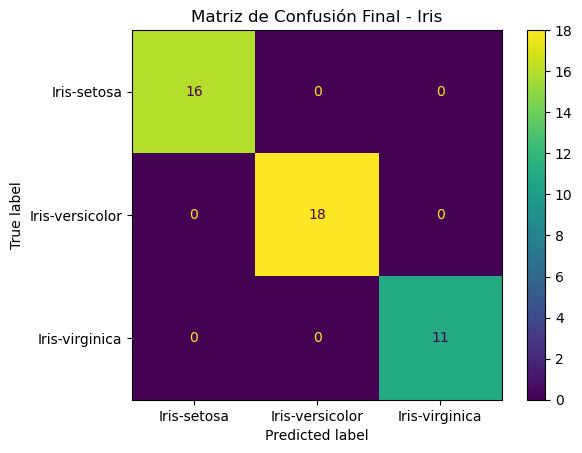

In [6]:
print("--- Pruebas Finales para IRIS ---")

mejor_distribucion_iris = "Gaussiano"
mejor_modelo_iris = GaussianNB()

mejor_modelo_iris.fit(X_train_iris, y_train_iris)
preds_finales_iris = mejor_modelo_iris.predict(X_test_iris)

acc_final_iris = accuracy_score(y_test_iris, preds_finales_iris)
resultados_tabla_2.append({"Dataset": "iris.csv", "Distribución": mejor_distribucion_iris, "Accuracy": acc_final_iris})
print(f"Accuracy Final (Prueba): {acc_final_iris:.4f}")

# --- Reporte de Clasificación ---
print("\n--- Reporte de Clasificación (Iris) ---")
print(classification_report(y_test_iris, preds_finales_iris))

# --- Matriz de Confusión ---
print("--- Matriz de Confusión (Iris) ---")
cm_iris = confusion_matrix(y_test_iris, preds_finales_iris, labels=mejor_modelo_iris.classes_)
disp_iris = ConfusionMatrixDisplay(confusion_matrix=cm_iris, display_labels=mejor_modelo_iris.classes_)
disp_iris.plot()
plt.title("Matriz de Confusión Final - Iris")
plt.show()

## Dataset Emails

### Cargar Datos

In [7]:
# Cargar Dataset emails.csv
df_emails = pd.read_csv('emails.csv')
X_emails = df_emails.iloc[:, 1:-1] 
y_emails = df_emails.iloc[:, -1]
print(f"Forma de X_emails: {X_emails.shape}, y_emails: {y_emails.shape}")

Forma de X_emails: (5172, 3000), y_emails: (5172,)


### División 70 / 30

In [8]:
# División 70/30 para Emails
X_train_emails, X_test_emails, y_train_emails, y_test_emails = train_test_split(
    X_emails, y_emails, test_size=0.3, random_state=RANDOM_STATE
)
print(f"Emails Train: {X_train_emails.shape}, Emails Test: {X_test_emails.shape}")

Emails Train: (3620, 3000), Emails Test: (1552, 3000)


### Validación Cruzada

In [9]:
print("--- Iniciando Validación Cruzada para EMAILS ---")
scores_gauss_emails = []
scores_multi_emails = []

X_train_emails_np = X_train_emails.values
y_train_emails_np = y_train_emails.values

fold_count = 1
for train_index, val_index in kf.split(X_train_emails_np):
    print(f"\nPliegue {fold_count}:")
    X_train_fold, X_val_fold = X_train_emails_np[train_index], X_train_emails_np[val_index]
    y_train_fold, y_val_fold = y_train_emails_np[train_index], y_train_emails_np[val_index]

    # --- Modelo GaussianNB ---
    modelo_gauss = GaussianNB()
    modelo_gauss.fit(X_train_fold, y_train_fold)
    preds_gauss = modelo_gauss.predict(X_val_fold)
    acc_gauss = accuracy_score(y_val_fold, preds_gauss)
    scores_gauss_emails.append(acc_gauss)
    print(f"    Accuracy (Gaussiano): {acc_gauss:.4f}")
    
    # --- Modelo MultinomialNB ---
    modelo_multi = MultinomialNB()
    modelo_multi.fit(X_train_fold, y_train_fold)
    preds_multi = modelo_multi.predict(X_val_fold)
    acc_multi = accuracy_score(y_val_fold, preds_multi)
    scores_multi_emails.append(acc_multi)
    print(f"    Accuracy (Multinomial): {acc_multi:.4f}")
    fold_count += 1

# Guardar resultados
resultados_tabla_1.append({"Dataset": "emails.csv", "Distribución": "Gaussiano", "Pliegue 1": scores_gauss_emails[0], "Pliegue 2": scores_gauss_emails[1], "Pliegue 3": scores_gauss_emails[2], "Promedio": np.mean(scores_gauss_emails)})
resultados_tabla_1.append({"Dataset": "emails.csv", "Distribución": "Multinomial", "Pliegue 1": scores_multi_emails[0], "Pliegue 2": scores_multi_emails[1], "Pliegue 3": scores_multi_emails[2], "Promedio": np.mean(scores_multi_emails)})

--- Iniciando Validación Cruzada para EMAILS ---

Pliegue 1:
    Accuracy (Gaussiano): 0.9478
    Accuracy (Multinomial): 0.9453

Pliegue 2:
    Accuracy (Gaussiano): 0.9428
    Accuracy (Multinomial): 0.9379

Pliegue 3:
    Accuracy (Gaussiano): 0.9494
    Accuracy (Multinomial): 0.9469


### Pruebas Finales

--- Pruebas Finales para EMAILS ---
Accuracy Final (Prueba): 0.9485

--- Reporte de Clasificación (Emails) ---
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552

--- Matriz de Confusión (Emails) ---


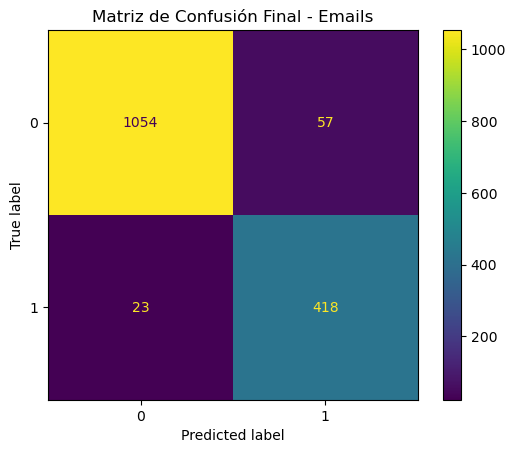

In [10]:
print("--- Pruebas Finales para EMAILS ---")

mejor_distribucion_emails = "Gaussiano"
mejor_modelo_emails = GaussianNB()

mejor_modelo_emails.fit(X_train_emails, y_train_emails)
preds_finales_emails = mejor_modelo_emails.predict(X_test_emails)

acc_final_emails = accuracy_score(y_test_emails, preds_finales_emails)
resultados_tabla_2.append({"Dataset": "emails.csv", "Distribución": mejor_distribucion_emails, "Accuracy": acc_final_emails})
print(f"Accuracy Final (Prueba): {acc_final_emails:.4f}")

# --- Reporte de Clasificación ---
print("\n--- Reporte de Clasificación (Emails) ---")
print(classification_report(y_test_emails, preds_finales_emails))

# --- Matriz de Confusión ---
print("--- Matriz de Confusión (Emails) ---")
cm_emails = confusion_matrix(y_test_emails, preds_finales_emails, labels=mejor_modelo_emails.classes_)
disp_emails = ConfusionMatrixDisplay(confusion_matrix=cm_emails, display_labels=mejor_modelo_emails.classes_)
disp_emails.plot()
plt.title("Matriz de Confusión Final - Emails")
plt.show()

## Resultados Finales

In [11]:
df_tabla_1 = pd.DataFrame(resultados_tabla_1)
df_tabla_1 = df_tabla_1.set_index(["Dataset", "Distribución"])
print("--- Tabla 1. Resultados de la validación cruzada (Etapa de Entrenamiento) ---")
display(df_tabla_1.style.format("{:.4f}"))

--- Tabla 1. Resultados de la validación cruzada (Etapa de Entrenamiento) ---


In [12]:
df_tabla_2 = pd.DataFrame(resultados_tabla_2)
df_tabla_2 = df_tabla_2.set_index(["Dataset"])
print("--- Tabla 2. Resultados de las pruebas finales (Etapa de Pruebas) ---")
display(df_tabla_2.style.format({'Accuracy': '{:.4f}'}))

--- Tabla 2. Resultados de las pruebas finales (Etapa de Pruebas) ---


,Distribución,Accuracy
Dataset,,
iris.csv,Gaussiano,1.0000
emails.csv,Gaussiano,0.9485
